# Workflow Example with CLIMATE_GRID input convertor
Here we illustrate a complete workflow example using the CLIMATE GRID convertor

## Imports

In [ ]:
from pathlib import Path

import xarray as xr
import pandas as pd

import valenspy as vp #The Valenspy package
from valenspy.inputconverter_functions import _non_convertor, CLIMATE_GRID_to_CF

from yaml import safe_load
from typing import Union, List

: 

In [ ]:
#Import Converter - This input converter will not do anything to the data.
ic = vp.InputConverter(CLIMATE_GRID_to_CF)


: 

## 1. Convert the data

### Get the filenames of ERA5 data corresponding to CORDEX variable name


In [3]:
machine = "hortense"

# User defined variable, here we look at 2m temperature. 
variable = "tas"
dataset = "CLIMATE_GRID"
region = "belgium" # "belgium"
time_freq = "daily" ## Important to account here are the postprocessed files at daily time resolution and their naming (eg max daily temperature does not correspond to ERA5 variable name as defined!!)

In [4]:
# Get the current file directory and load the CORDEX variables.yml file

# files = Path(__file__).resolve().parent -- this is not working in notebook
src_path = Path("../src/valenspy") ## -- to be removed. 

with open(src_path / "ancilliary_data" / "CORDEX_variables.yml") as file:
    CORDEX_VARIABLES = safe_load(file)

with open(src_path / "ancilliary_data" / Path("CLIMATE_GRID_lookup.yml")) as file:
    obs_LOOKUP = safe_load(file)

In [ ]:
41*0.125

: 

In [ ]:
xsize    = 41
ysize    = 25

: 

In [5]:
# get path of observational datasets from path settings .yml
with open(src_path / "ancilliary_data" / Path("dataset_PATHS.yml")) as file:
    dataset_PATHS = safe_load(file)
directory = Path(dataset_PATHS[machine][dataset])

# open the EOBS file for the corresponding variable
files = list(directory.glob(obs_LOOKUP[variable]['obs_name']+"*"+time_freq+"*.nc")) #Select all the netCDF files in the directory
files

[PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/TEMP_AVG_CLIMATE_GRID_1950_2023_daily.nc')]

In [6]:
# pass user defined metatadata
metadata_info = {'region' : region, 'freq' : time_freq, 'spatial_resolution': '5 km' }
# test of ERA5 convertor function
CLIMATE_GRID_ds = ic.convert_input(files, metadata_info) #Convert the input to the correct format
CLIMATE_GRID_ds

<xarray.Dataset> Size: 567MB
Dimensions:  (lon: 57, lat: 46, time: 27028)
Coordinates:
  * lon      (lon) float64 456B 2.514 2.584 2.654 2.724 ... 6.289 6.359 6.428
  * lat      (lat) float64 368B 49.51 49.55 49.6 49.64 ... 51.44 51.49 51.53
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    tas      (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
Attributes:
    creation_date:  10-06-2024
    creators:       Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:        inne.vanderkelen@meteo.be
    version:        1.1
    affiliation:    Royal Meteorological Institute of Belgium
    dataset:        CLIMATE_GRID

In [8]:
CLIMATE_GRID_ds[variable]

<xarray.DataArray 'tas' (time: 27028, lat: 46, lon: 57)> Size: 567MB
dask.array<add, shape=(27028, 46, 57), dtype=float64, chunksize=(17117, 28, 35), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 456B 2.514 2.584 2.654 2.724 ... 6.289 6.359 6.428
  * lat      (lat) float64 368B 49.51 49.55 49.6 49.64 ... 51.44 51.49 51.53
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Attributes:
    units:               K
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    original_name:       TEMP_AVG
    original_long_name:  Near-Surface Air Temperature
    dataset:             CLIMATE_GRID
    region:              belgium
    freq:                daily
    spatial_resolution:  5 km

/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/innev/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in add
  return func(*(_execute_task(a, cache) for a in args))


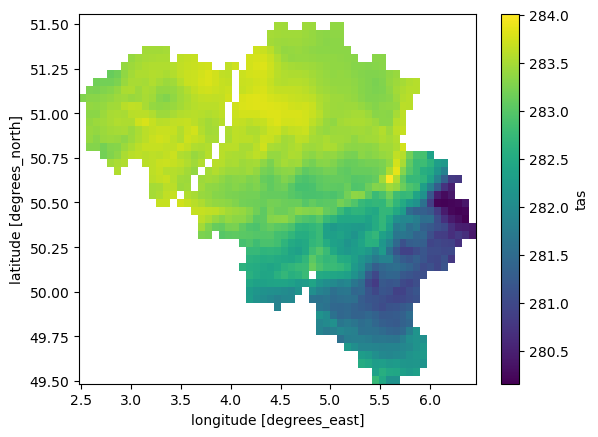

In [7]:
CLIMATE_GRID_ds[variable].mean('time').plot()

/dodrio/scratch/projects/2022_200/RCS/CORDEXBE2/innev/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in add
  return func(*(_execute_task(a, cache) for a in args))


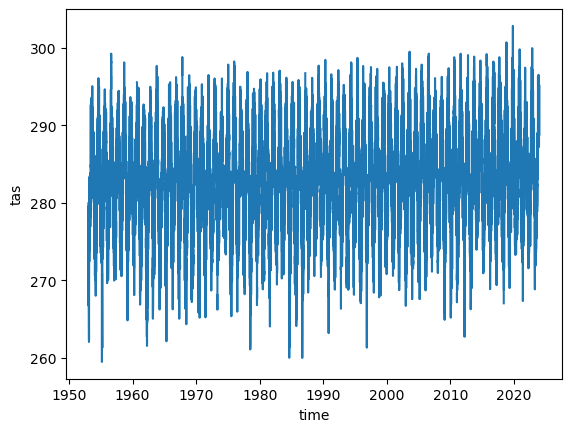

In [9]:
CLIMATE_GRID_ds[variable].mean(dim=('lat','lon')).plot()

### Check CLIMATE_GRID for all available variables

In [25]:
files = []
# check for all available variables
variables_obs = list(obs_LOOKUP.keys())
variables_cordex = list(CORDEX_VARIABLES.keys())

# keep only variables in both 
variables = [value for value in variables_obs if value in variables_cordex]

# get path of observational datasets from path settings .yml
with open(src_path / "ancilliary_data" / Path("dataset_PATHS.yml")) as file:
    dataset_PATHS = safe_load(file)
    
directory = Path(dataset_PATHS[machine][dataset])

# open the EOBS file for the corresponding variable
for variable in variables:
    # get ERA5 subdirectory
    files+= list(directory.glob(obs_LOOKUP[variable]['obs_name']+"*"+time_freq+"*.nc")) #Select all the netCDF files in the directory

In [27]:
files

[PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/TEMP_AVG_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/TEMP_MAX_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/TEMP_MIN_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/PRECIP_QUANTITY_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/HUMIDITY_RELATIVE_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/WIND_SPEED_CLIMATE_GRID_1950_2023_daily.nc'),
 PosixPath('/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/CLIMATE_GRID/SHORT_WAVE_FROM_SKY_CLIMA

In [28]:
# Example without metadata passed 

# test of ERA5 convertor function
CLIMATE_GRID_ds = ic.convert_input(files) #Convert the input to the correct format
CLIMATE_GRID_ds

<xarray.Dataset> Size: 5GB
Dimensions:  (lon: 57, lat: 46, time: 27028)
Coordinates:
  * lon      (lon) float64 456B 2.514 2.584 2.654 2.724 ... 6.289 6.359 6.428
  * lat      (lat) float64 368B 49.51 49.55 49.6 49.64 ... 51.44 51.49 51.53
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Data variables:
    evspsbl  (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    huss     (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    pr       (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    psl      (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    rsds     (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    tas      (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    tasmax   (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    tasmin   (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
    sfcWind  (time, lat, lon) float64 567MB dask.array<chunksize=(17117, 28, 35), meta=np.ndarray>
Attributes:
    creation_date:          10-06-2024
    creators:               Ghilain N., Van Schaeybroeck B., Vanderkelen I.
    contact:                inne.vanderkelen@meteo.be
    version:                1.1
    horizontal resolution:  5 by 5 km
    affiliation:            Royal Meteorological Institute of Belgium
    dataset:                CLIMATE_GRID
    freq:                   daily
    spatial_resolution:     5km
    region:                 belgium

In [29]:
CLIMATE_GRID_ds['rsds']

<xarray.DataArray 'rsds' (time: 27028, lat: 46, lon: 57)> Size: 567MB
dask.array<truediv, shape=(27028, 46, 57), dtype=float64, chunksize=(17117, 28, 35), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 456B 2.514 2.584 2.654 2.724 ... 6.289 6.359 6.428
  * lat      (lat) float64 368B 49.51 49.55 49.6 49.64 ... 51.44 51.49 51.53
  * time     (time) datetime64[ns] 216kB 1950-01-01 1950-01-02 ... 2023-12-31
Attributes:
    units:               W m-2
    standard_name:       surface_downwelling_shortwave_flux_in_air
    long_name:           Surface Downwelling Shortwave Radiation
    original_name:       SHORT_WAVE_FROM_SKY
    original_long_name:  average daily global solar radiation
    dataset:             CLIMATE_GRID
    freq:                daily
    spatial_resolution:  5km
    region:              belgium